In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

In [ ]:
dataset = pd.read_csv('/content/USA_Housing.csv')
dataset.head()

FileNotFoundError: ignored

In [ ]:
dataset['Address'].unique().shape

(5000,)

In [ ]:
dataset.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [ ]:
X = dataset.drop(['Price','Address'],axis=1)
Y = dataset['Price']

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)

In [ ]:
X_train.shape

(3750, 5)

In [ ]:
X_train.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
4607,86985.764343,6.394601,7.349363,3.29,25788.672358
3928,42245.800780,4.878096,7.328274,4.34,53670.662632
1267,61602.038128,5.430075,6.653459,3.16,45188.139643
1459,35963.330809,3.438547,8.264122,3.28,24435.777302
474,70879.908301,6.739318,7.626799,5.47,22431.606262


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
lr = LinearRegression()

lr.fit(X_train,Y_train)

LinearRegression()

In [ ]:
prediction = lr.predict(X_test)
score_r2 = r2_score(Y_test,prediction)
score_MSE = mean_squared_error(Y_test,prediction)
print("R2 SCORE : " + str(score_r2))
print("MSE SCORE : "+str(score_MSE))

R2 SCORE : 0.9164643159266994
MSE SCORE : 10290983843.121262


Text(0, 0.5, 'Predicted Price')

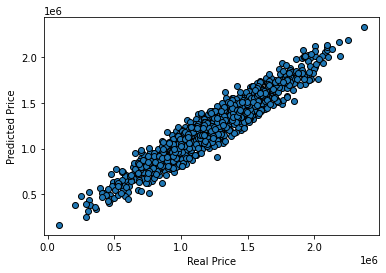

In [ ]:
plt.scatter(Y_test, prediction, edgecolor='black')
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')

In [ ]:
coeff_df = pd.DataFrame(lr.coef_, X_train.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.538451
Avg. Area House Age,165281.037323
Avg. Area Number of Rooms,119066.630195
Avg. Area Number of Bedrooms,2724.966596
Area Population,15.189356


In [ ]:
print("Bias b : "+str(lr.intercept_))

Bias b : -2625861.16895781




*   Holding all other features fixed, a 1 unit increase in Avg. Area Income is associated with an increase of $21.52 .

*   Holding all other features fixed, a 1 unit increase in Avg. Area House Age is associated with an increase of $164883.28 .


*   Holding all other features fixed, a 1 unit increase in Avg. Area Number of Rooms is associated with an increase of $122368.67 .

*   Holding all other features fixed, a 1 unit increase in Avg. Area Number of Bedrooms is associated with an increase of $2233.80 .


*   Holding all other features fixed, a 1 unit increase in Area Population is associated with an increase of $15.15 .












In [ ]:
from sklearn import metrics

print('MAE:'+ str(metrics.mean_absolute_error(Y_test, prediction))+ '$')
print('MSE:'+ str(metrics.mean_squared_error(Y_test, prediction))+'$')
print('RMSE:'+str(np.sqrt(metrics.mean_squared_error(Y_test, prediction)))+'$')

MAE:80672.56565407495$
MSE:10041039773.2559$
RMSE:100204.98876431203$


 * MAE is the easiest to understand, because it's the average error.
 * MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
 * RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.